# HEART DISEASE CLASSIFICATION

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline


In [4]:
df = pd.read_csv('heart.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])
df.isnull().sum()


Number of rows in the dataset:  303
Number of columns in the dataset:  14


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## DATA VISUALISATION

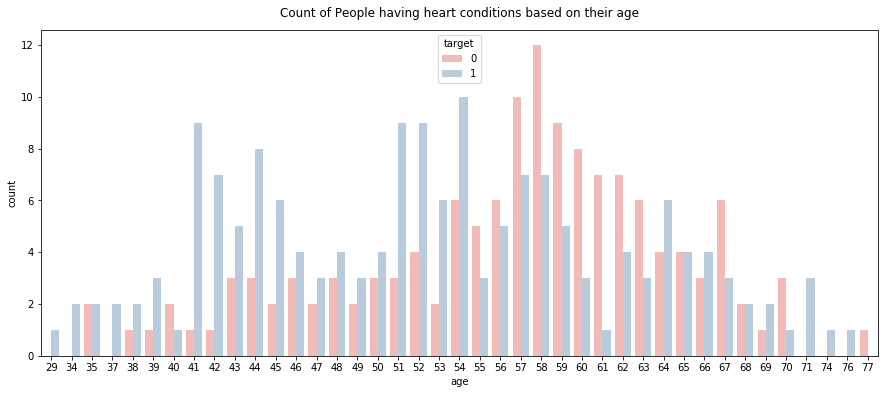

In [8]:
#Age vs heart condition
#target 0 =heart condition exists  
#target 1 =heart condition doesn't exist
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='Pastel1')
plt.title("Count of People having heart conditions based on their age", y=1.02);
plt.show()

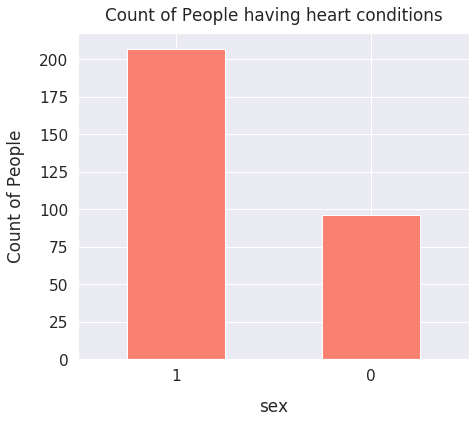

In [9]:
sns.set(font_scale=1.4)
df['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color='salmon')

plt.xlabel("sex", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People having heart conditions", y=1.02);

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
#creating a seprate group of count 
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Text(0.5, 1.08, 'Count of People having heart conditions based on their gender')

<Figure size 1080x432 with 0 Axes>

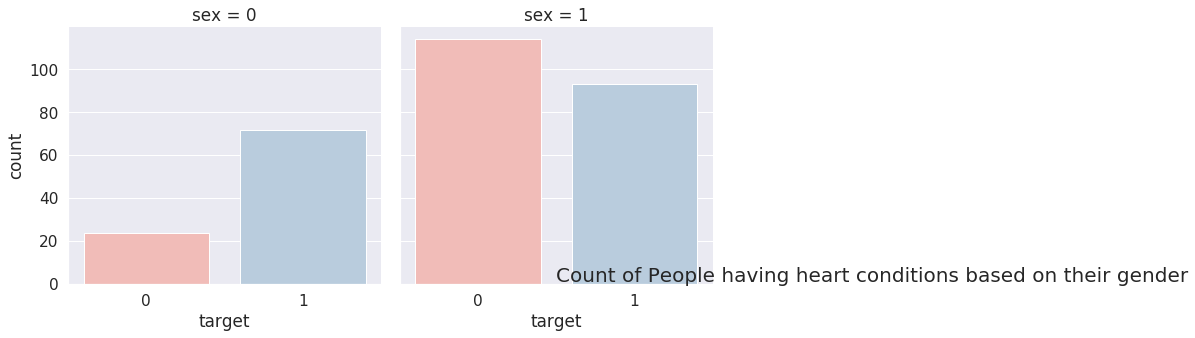

In [12]:
#Gender vs heart condition
#target 0 =heart condition exists  
#target 1 =heart condition doesn't exist
#sex 0 = female
#sex 1 = male
plt.figure(figsize=(15,6))
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1,palette='Pastel1')
figure_title = "Count of People having heart conditions based on their gender"
plt.text(0.5, 1.08, figure_title,horizontalalignment='left',fontsize=20)


207 96


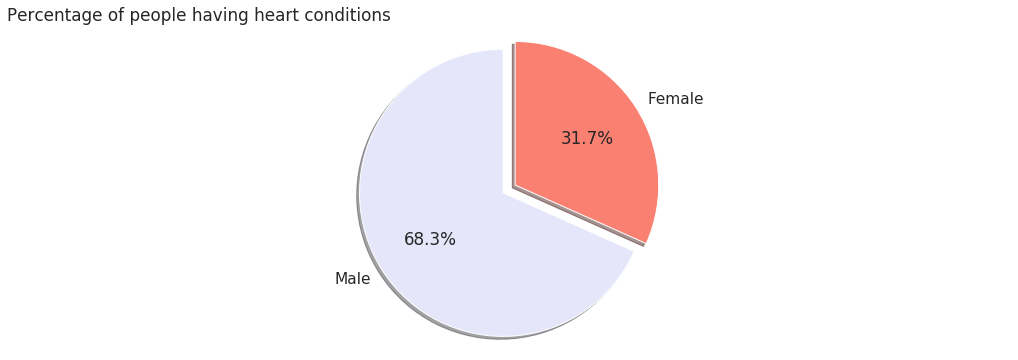

In [13]:
# ratio of male to female having heart conditions

male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])
print(male,female)
plt.figure(figsize=(18,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['lavender', 'salmon']
explode = (0,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage of people having heart conditions", y=1,loc='left');
plt.axis('equal')
plt.show()


Text(0.5, 1.0, 'showing the relation between age group and cp')

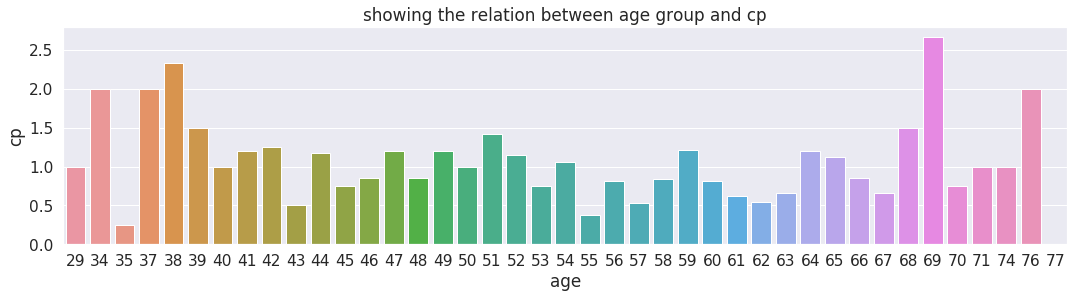

In [14]:
#cp: chest pain type 
cp_dat = df.groupby("age", as_index=False).cp.mean()
plt.figure(figsize=(18,4))
sns.barplot(x=cp_dat["age"], y=cp_dat["cp"])
plt.title("showing the relation between age group and cp")

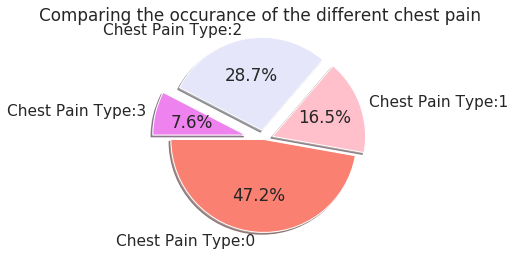

In [15]:
#Chest Pain Type
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['salmon', 'pink','lavender','violet']
explode = (0,0.1,0.1,0.2)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Comparing the occurance of the different chest pain")
plt.axis('equal')
plt.show()

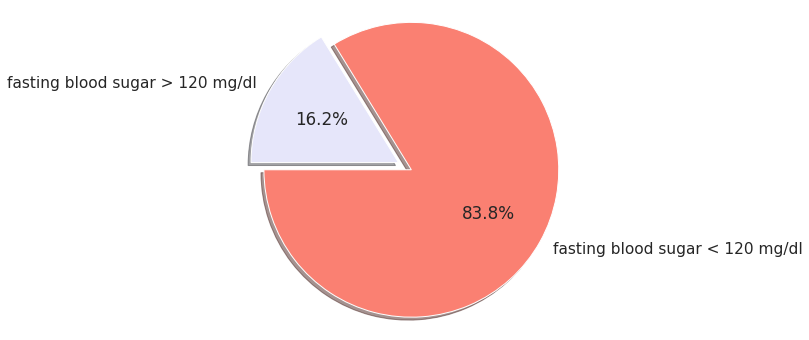

In [16]:
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['salmon', 'lavender','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

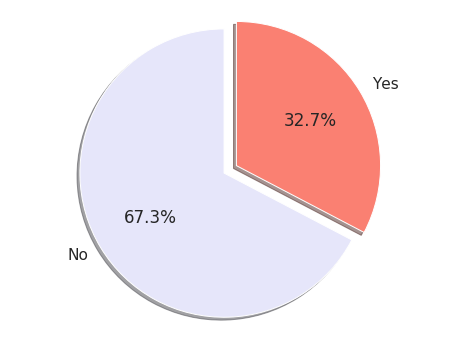

In [17]:
#exang: exercise induced angina (1 = yes; 0 = no)
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['lavender', 'salmon']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

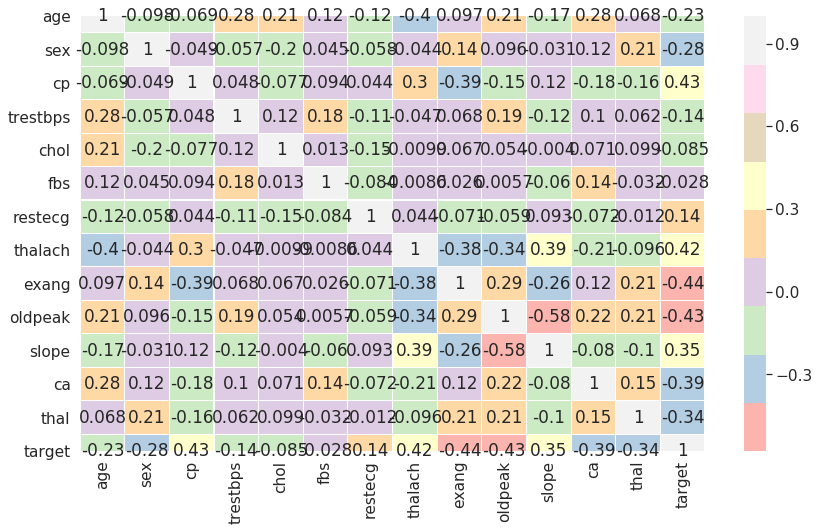

In [18]:
#CREATING A HEATMAP TO UNDERSTAND THE RELAPTIONSHIP BETWEEN THE PARAMETERS
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='Pastel1',linewidths=.1)
plt.show()

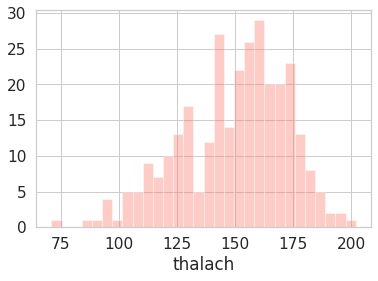

In [19]:
#maximum heart rate achieved
sns.distplot(df['thalach'],kde=False,bins=30,color='salmon')

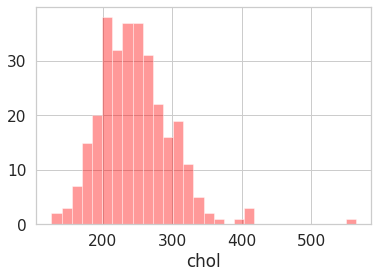

In [20]:
#serum cholestoral in mg/dl 
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

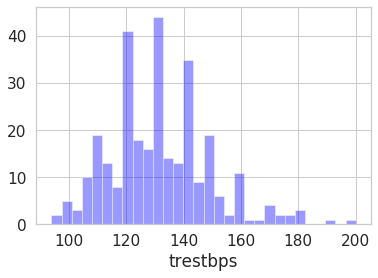

In [21]:
#resting blood pressure (in mm Hg on admission to the hospital)¶
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()


## PREDICTION

In [22]:
# Splitting data into train and test dataset

X= df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### KNN ALGORITHM

In [24]:
#Implementing GridSearchCv to select best parameters and applying k-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [25]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [26]:
model.fit(X_train,y_train)
model.best_params_ 

/home/sushmitha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 1, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

#### PREDICTION

In [54]:
#Making predictions
predict = model.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1])

#### ACCURACY METRICS

In [28]:
#Checking accuracy

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using k-NN we get an accuracy score of:  81.319 %


In [29]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[32,  9],
       [ 8, 42]])

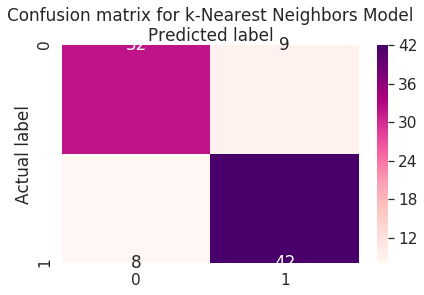

In [30]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'RdPu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [32]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)


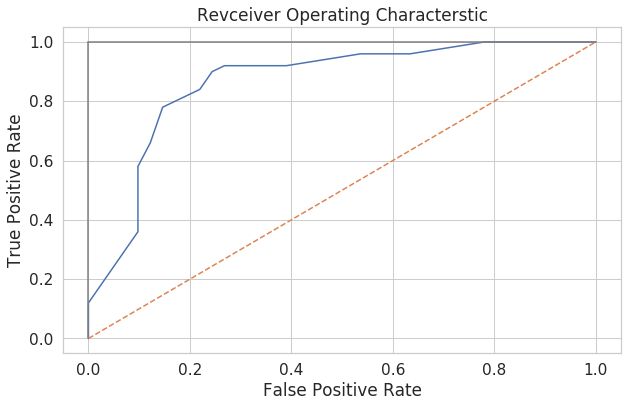

0.8651219512195122

In [33]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

### LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [35]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [36]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

/home/sushmitha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

#### PREDICTION

In [37]:
#Making predictions

predict = log_model.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

#### ACCURACY METRICS

In [38]:
#Accuracy Metrics

from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [39]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [40]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[33,  8],
       [ 8, 42]])

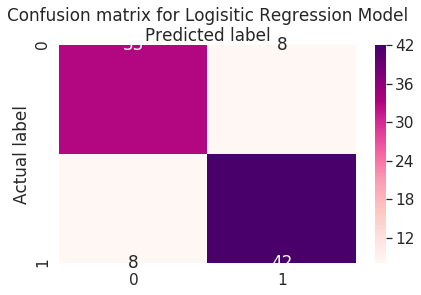

In [41]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'RdPu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

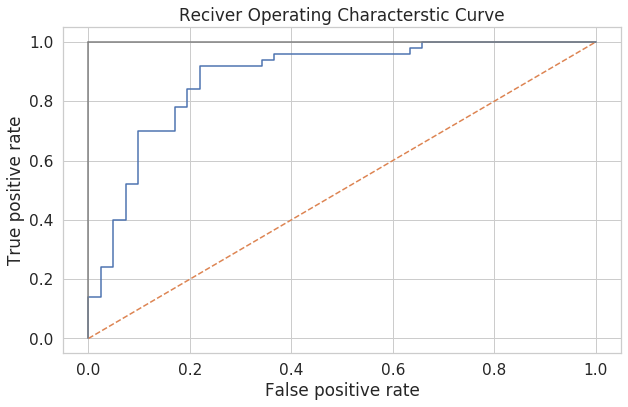

0.8804878048780488

In [42]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

### DECISION TREE CLASSIFICATION

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [44]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [45]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

/home/sushmitha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7}

#### PREDICTION

In [46]:
#Making predictions

predict = tree_model.predict(X_test)
predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0])

#### ACCURACY METRICS


In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %


In [48]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
#Classification Report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73        41
           1       0.80      0.66      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.73      0.73        91



In [49]:
#Confusion Matrix

cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[33,  8],
       [17, 33]])

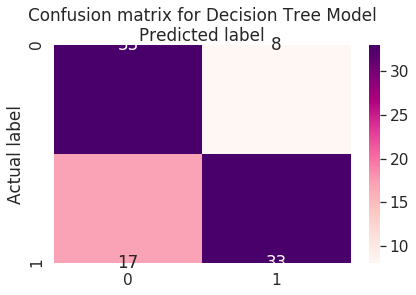

In [50]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'RdPu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

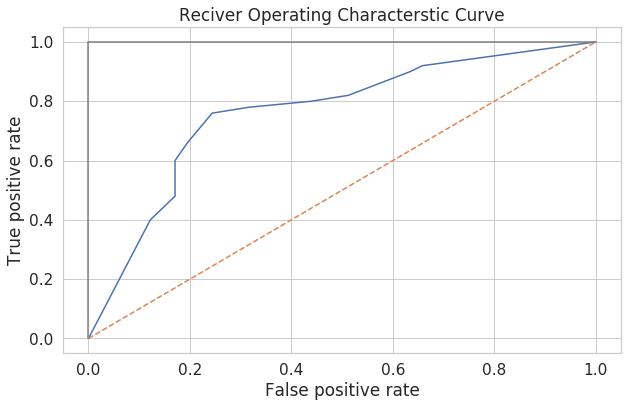

0.7626829268292683

In [51]:
#Receiver Operating Characterstic(ROC) Curve

#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

#Calculate area under the curve
roc_auc_score(y_test,target_probailities_tree)


## Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree


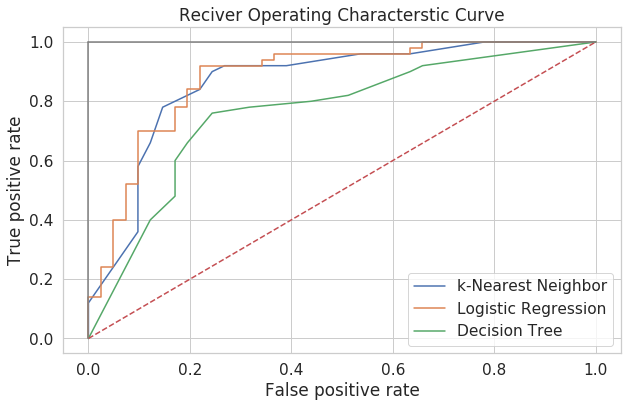

In [52]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Using Logistic Regression we get an accuracy score of:  82.418 %

Using k-NN we get an accuracy score of:  81.319 %

Using Decision Tree we get an accuracy score of:  72.527 %